## CNN ILE MNIST VERI SETI ÜZERINDE DERIN ÖĞRENME
- Kütüphaneleri dahil ediyoruz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

In [2]:
tf.__version__

'2.18.0'

- mnist veri seti kendi içerisinde train test olarak etiketleriyle birlikte ayrılmış şekilde gelir bu yüzden bu adımda bunu local değişkenlerimize attık
- featureların olduğu değişkenlerimizi normalleştirme yaptık 

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0 

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


- model eğitimi öncesi örnek ilk 5 görselin çizdirilmesi ve etiketiyle beraber gösterilmesini gerçekleştirdik

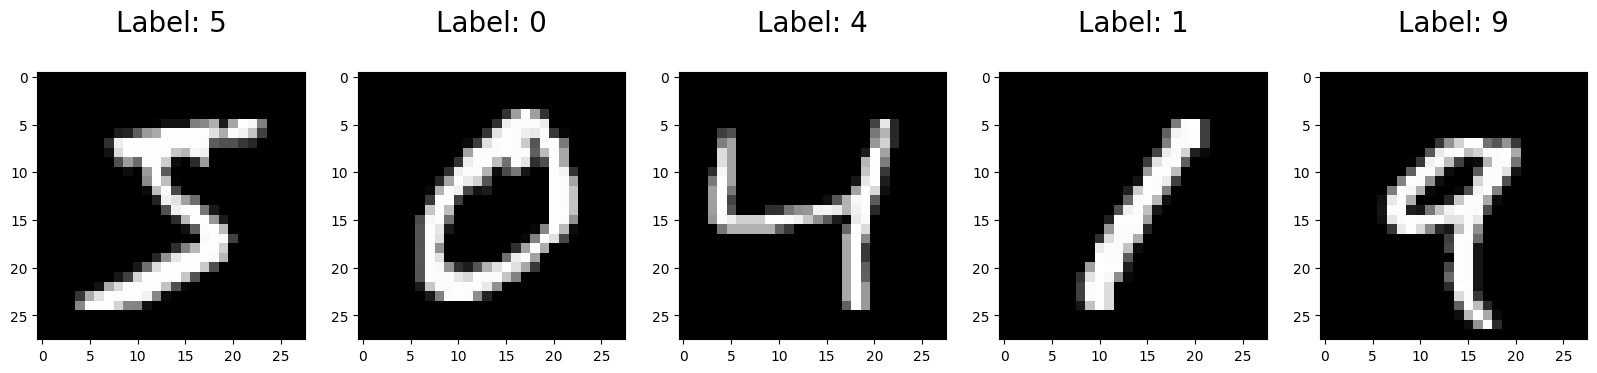

In [5]:
plt.figure(figsize=(20,8))
for index, (image, label) in enumerate(zip(x_train[0:5],
                                           y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Label: %i\n' % label, fontsize = 20);


### CNN (Evrişimli Sinir Ağı ~ Convolutional Neural Network)

Bu bölümde, model eğitimi için bir fonksiyon oluşturduk. Adımlarımız şu şekildedir:

1. **Modelin Sequential bir model olacağını belirledik.**  
   Modelimizi oluştururken **Sequential** yapısını kullandık. Bu sayede katmanlarımızı sıralı bir şekilde ekleyebiliyoruz.

2. **Convolution katmanı ekledik.**  
   - 32 adet feature oluşturacak  
   - 5x5 boyutunda bir matris kullanacak  
   - Aktivasyon fonksiyonu **ReLU** olacak  
   - Giriş boyutu **28x28** ve **1 kanallı (grayscale)** olacak.

3. **Pooling işlemi uyguladık.**  
   - **MaxPooling2D** kullanarak **(3,3)** boyutunda bir havuzlama işlemi yaptık.  
   - Bu işlem, özellik haritalarını daha özet hale getirerek boyutu küçülttü.

4. **64 adet feature oluşturan yeni bir Convolution katmanı ekledik.**  
   - Ancak, pooling işlemi sonucunda giriş boyutumuz değişti.  
   - **Eğer padding kullanmazsak hata alabiliriz.**  
   - Bu nedenle **padding='same'** ekledik.

5. **Tekrar Pooling işlemi uyguladık.**  
   - Modelin karmaşıklığını azaltmak ve önemli özellikleri korumak için bir kez daha **MaxPooling2D** ekledik.

6. **Son kez Convolution katmanı ekledik.**  
   - 64 filtre ile **(5,5)** boyutunda bir **Convolution katmanı** daha ekledik.  
   - Yine **padding='same'** kullanarak boyut korunmuş oldu.

7. **Flatten (Düzleştirme) adımını uyguladık.**  
   - Sinir ağları, **düz (1D) array** şeklinde veri girişini kabul ettiği için **Flatten** katmanını ekledik.

8. **Tam bağlantılı (Dense) katmanlar ekledik.**  
   - Bir **ara katman** olarak **64 nöronlu Dense** katmanı ekledik ve aktivasyon fonksiyonunu **ReLU** olarak seçtik.  
   - Son olarak **10 sınıflı (MNIST için) çıktı katmanı ekledik.** Aktivasyon fonksiyonunu **softmax** seçerek olasılıkların normalize edilmesini sağladık.


In [6]:
def cnn():
    model = models.Sequential()
    

    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    
    model.add(layers.Flatten())
    

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes
    
    return model
    

- fonksiyonu çağırdık modeli oluşturduk ve modelimizin özetini yansıttık .

In [7]:
model=cnn()
model.summary()

c:\Users\Harun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,658 (670.54 KB)

 Trainable params: 171,658 (670.54 KB)

 Non-trainable params: 0 (0.00 B)

### **Modelin Derlenmesi (Compile İşlemi)**

1. **optimizer='adam'**  Modelin ağırlıklarını güncellemek için **Adam optimizasyon algoritmasını** kullanıyoruz. 
2. **loss='sparse_categorical_crossentropy'** Kayıp fonksiyonunu **sparse categorical crossentropy** olarak belirledik. 
3. **metrics=['accuracy']** Modelin başarımını ölçmek için **accuracy (doğruluk) metriğini** kullanıyoruz.
4. Modeli fit ile eğitimini tamamlıyoruz değişkenlerimizi modele yüklüyoruz 
5. Modelin doğruluk metriklerini ekrana yazdırıyoruz.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8329 - loss: 0.5247 - val_accuracy: 0.9822 - val_loss: 0.0582
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9825 - loss: 0.0581 - val_accuracy: 0.9847 - val_loss: 0.0459
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9878 - loss: 0.0394 - val_accuracy: 0.9850 - val_loss: 0.0496
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9897 - loss: 0.0291 - val_accuracy: 0.9922 - val_loss: 0.0319
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9882 - val_loss: 0.0407


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0458
Test accuracy: 0.987500011920929
Test loss: 0.03689824044704437


- Ornek olarak Kullanıcınn girdiği sayı adeti kadar örnekleri nasıl tahmin ettiğini ve görselleriyle birlikte çizdirdik 

In [11]:
sample_num = int(input("Kaç Adet tahmini görmek istiyorsanız sayi olarak giriniz"))
indices  = np.random.choice(len(x_test), sample_num, replace=False)
sample_image = x_test[indices ]
sample_labeled = y_test[indices ]


In [12]:
predictions = model.predict(sample_image)
labeled_predictions = np.argmax(predictions, axis=1)  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


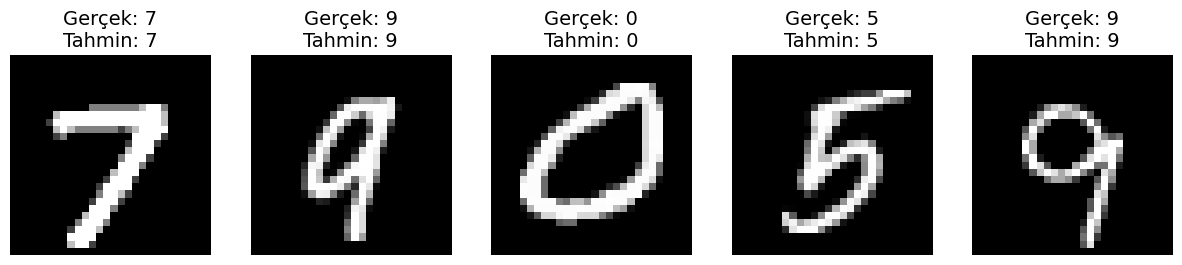

In [13]:

plt.figure(figsize=(15, 5))

for i, (image, true_label, etiketli_tahminler) in enumerate(zip(sample_image, sample_labeled, labeled_predictions)):
    plt.subplot(1, sample_num, i + 1)
    plt.imshow(image.squeeze(), cmap="gray")  # Gri tonlamalı göster
    plt.title(f"Gerçek: {true_label}\nTahmin: {etiketli_tahminler}", fontsize=14)
    plt.axis("off")

plt.show()

- Modelimizdeki test verilerimizin hepsini bu sefer veriyoruz ve modelimizde ne kadar adet yanlış tahmin ettiğini bulup aynı zamanda bazısını çizdiyoruz.

In [14]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)  
true_labels = y_test  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
wrong_indices = np.where(predicted_labels != true_labels)[0]  

print("Yanlış Tahmin Edilenlerin Sayısı -> " + str(len(wrong_indices))+ " Adet Vardır.")
print("Yanlış Tahmin Edilen Örnekler (İlk 10):")
for i in range(min(10, len(wrong_indices))):  
    index = wrong_indices[i]
    print(f"Index: {index} - Gerçek: {true_labels[index]} - Tahmin: {predicted_labels[index]}")

Yanlış Tahmin Edilenlerin Sayısı -> 125 Adet Vardır.
Yanlış Tahmin Edilen Örnekler (İlk 10):
Index: 115 - Gerçek: 4 - Tahmin: 9
Index: 151 - Gerçek: 9 - Tahmin: 8
Index: 320 - Gerçek: 9 - Tahmin: 8
Index: 359 - Gerçek: 9 - Tahmin: 8
Index: 420 - Gerçek: 4 - Tahmin: 8
Index: 447 - Gerçek: 4 - Tahmin: 9
Index: 449 - Gerçek: 3 - Tahmin: 5
Index: 582 - Gerçek: 8 - Tahmin: 3
Index: 583 - Gerçek: 2 - Tahmin: 8
Index: 619 - Gerçek: 1 - Tahmin: 8


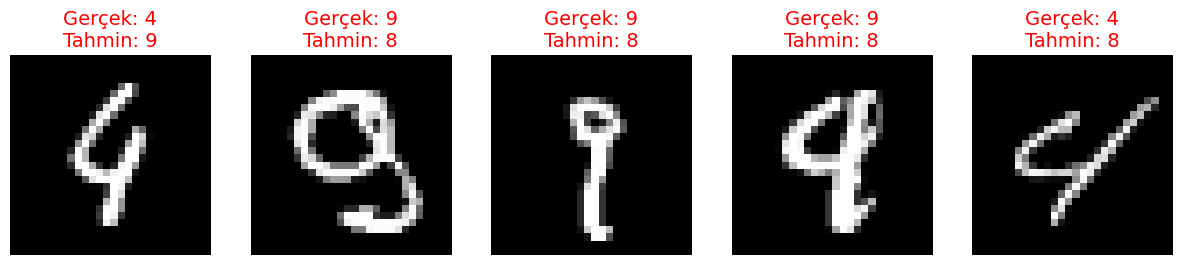

In [16]:
num_samples = min(5, len(wrong_indices)) 
plt.figure(figsize=(15, 5))

for i, index in enumerate(wrong_indices[:num_samples]):
    image = x_test[index]
    true_label = true_labels[index]
    predicted_label = predicted_labels[index]
    
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Gerçek: {true_label}\nTahmin: {predicted_label}", fontsize=14, color='red')
    plt.axis("off")

plt.show()
